# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.OrdinalRegression import OrdinalRegression, softplus, softplus_inv, plot_model
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

# Ordinal Regression Testing

## Sequence State 2--Gaussian perfect separation

### Toy Data

In [4]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

,temperature_1,temperature_2,ordinal_label
0,13.446886,-0.552414,1
1,12.467339,-0.456510,1
2,12.240646,1.487031,3
3,12.920970,1.347114,3
4,12.365956,-0.505576,1
...,...,...,...
995,13.299201,-1.777017,0
996,12.508565,1.482781,3
997,12.692524,0.986925,2
998,12.897209,-0.374903,1


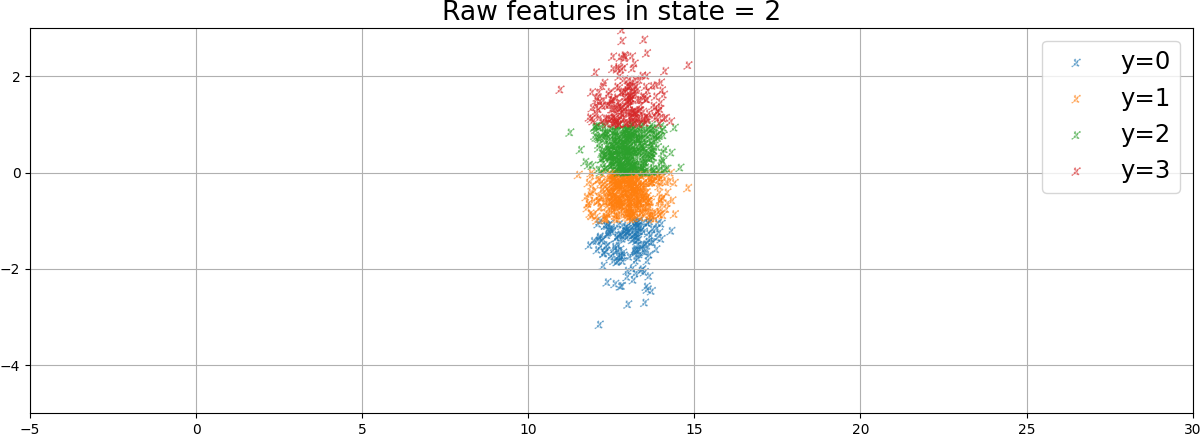

In [5]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [6]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.4468864  -0.55241445]
 [12.46733864 -0.45650953]
 [12.24064581  1.48703067]
 ...
 [12.69252415  0.9869254 ]
 [12.89720911 -0.37490277]
 [14.0738536   1.12059795]]
y: (1000,)
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 3 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 0 2 1 1 0 2
 3 2 1 2 3 2 3 3 2 1 1 3 3 1 0 2 1 2 1 1 1 3 1 2 3 2 1 3 1 3 0 1 3 2 0 1 3
 1 3 2 3 0 2 2 1 1 1 1 3 2 1 2 2 1 3 3 2 2 2 1 3 1 0 1 2 1 3 2 1 2 3 0 3 2
 3 2 1 2 1 0 1 2 0 2 1 2 1 2 1 2 2 2 3 2 1 1 1 0 3 2 2 2 1 3 2 0 2 1 3 2 3
 1 1 3 3 1 0 3 2 1 0 2 2 1 3 2 2 2 3 3 3 2 0 2 1 3 1 0 3 1 1 1 2 1 2 0 3 2
 1 3 0 3 3 2 3 1 2 3 2 2 2 1 1 1 3 0 0 2 2 1 0 2 2 3 2 2 0

## Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.91715472  2.99132472  2.99132472  1.24874122 -0.2733706
 -1.61786309]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.99871728  2.94958722  2.94958722  1.33030379  0.69997141
 -1.54652226]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92884273  2.98534369  2.98534369  1.26042923 -0.13388953
 -1.60763986]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92733784  2.98611377  2.98611377  1.25892434 -0.15184843
 -1.60895615]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92657887  2.98650216  2.98

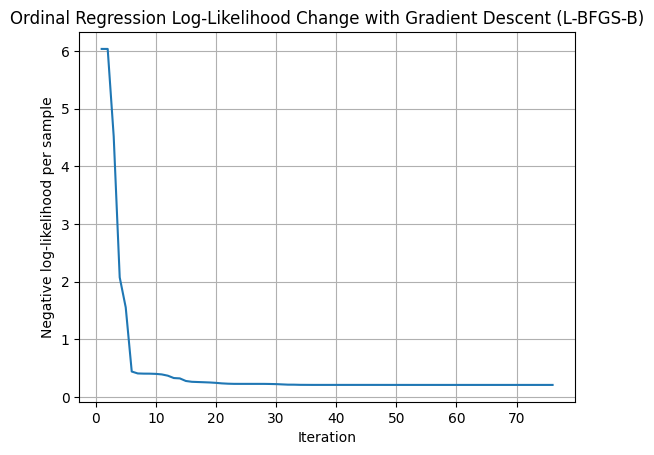

In [7]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)
VARIANCE:
1.0


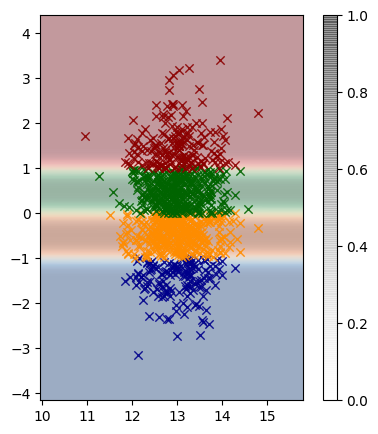

In [8]:
plot_model(clf)

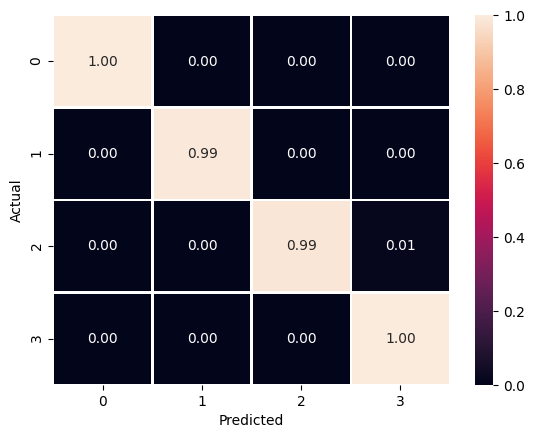

In [9]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Sequence State 2--Gaussian with label noise

### Toy Data

In [10]:
state_2_with_noise_df = pd.read_csv('../toydata/simulated_data/features_from_state2_with_noise.csv')
state_2_with_noise_df

,temperature_1,temperature_2,ordinal_label
0,13.682240,-0.270844,1
1,12.827138,0.170413,2
2,13.134810,-1.250821,0
3,13.855927,-0.997437,1
4,12.251163,0.461599,2
...,...,...,...
995,12.053603,0.520350,2
996,12.252508,0.504194,2
997,12.485143,-0.179090,1
998,14.121121,0.269070,2


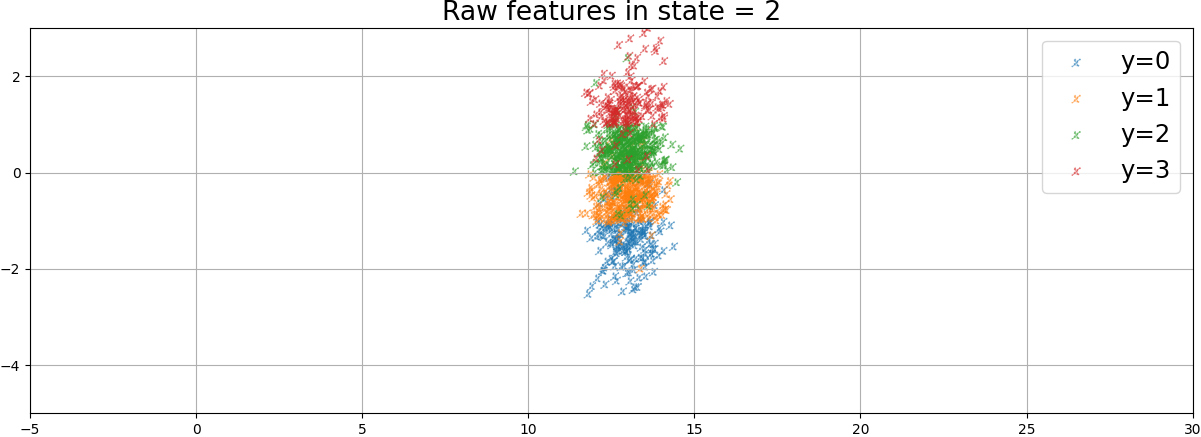

In [11]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state2_with_noise.png') 

In [12]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_with_noise_df[['temperature_1', 'temperature_2']].values
y = state_2_with_noise_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.68223993 -0.27084448]
 [12.82713824  0.17041255]
 [13.13481027 -1.2508206 ]
 ...
 [12.48514255 -0.17908988]
 [14.12112116  0.26906959]
 [12.84069171 -0.49300344]]
y: (1000,)
[1 2 0 1 2 3 2 2 1 1 1 2 3 0 0 1 1 3 1 2 1 3 1 0 1 2 1 2 2 1 2 0 2 1 0 2 2
 2 1 2 3 2 3 0 1 1 1 1 2 2 2 1 2 2 2 0 2 2 3 0 2 1 2 0 0 1 2 2 2 1 1 1 1 2
 1 0 1 2 0 1 1 2 3 0 2 2 2 1 0 0 1 3 2 2 0 1 1 0 0 0 2 2 1 1 1 2 2 1 2 3 3
 0 3 2 0 1 0 0 1 0 1 1 2 3 1 1 1 2 3 1 0 2 3 3 1 1 2 2 2 2 1 3 2 2 3 1 0 2
 1 1 0 2 1 1 1 1 1 0 2 0 2 0 1 3 1 0 1 1 2 0 2 1 2 2 2 1 2 0 1 3 0 1 0 1 1
 0 3 3 1 1 1 3 1 2 2 2 2 1 3 1 3 1 1 1 1 0 2 2 2 0 3 1 2 0 2 1 1 1 2 0 3 3
 1 0 1 2 3 3 2 1 2 2 2 1 3 0 2 0 3 2 2 3 2 0 0 0 1 1 2 1 0 2 2 1 2 2 2 2 0
 3 1 2 3 2 3 3 2 0 2 3 2 3 0 1 0 1 1 1 1 3 2 2 2 0 2 3 3 2 2 3 1 3 1 1 3 1
 1 2 1 3 0 2 0 0 3 2 3 2 0 1 2 2 2 1 3 1 3 2 3 1 2 1 0 3 0 2 0 1 2 1 3 0 2
 0 3 2 1 2 3 2 1 3 1 1 3 3 3 2 2 1 1 0 1 3 2 2 3 1 2 2 2 1 0 0 1 1 0 2 2 3
 2 1 2 1 2 2 2 0 2 2 0 0 0 2 3 2 1 1 1 2 2 2 2 1 0 0 1 0 1

### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
VARIANCE:
Autograd ArrayBox with value [1.]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with

/Users/alexanderlobo/Code/pchmm-missing-data-limited-labels/venv/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


best noise:
1.0
best deltas:
[3. 3.]
best cutpoints:
[-3.  0.  3.]
best weights:
[ 1.3315865   0.71527897 -1.54540029]
VARIANCE:
1.0
VARIANCE:
1.0
[[3.54299538e-48 4.30498158e-31 6.90140375e-18 1.00000000e+00]
 [2.46948447e-40 6.34743949e-25 2.19088650e-13 1.00000000e+00]
 [1.42712547e-55 4.94642916e-37 2.23676060e-22 1.00000000e+00]
 ...
 [4.61973620e-42 2.86389771e-26 2.37317920e-14 1.00000000e+00]
 [6.19477683e-45 1.59436719e-28 5.44858179e-16 1.00000000e+00]
 [1.49720724e-46 8.41225445e-30 6.25512909e-17 1.00000000e+00]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 

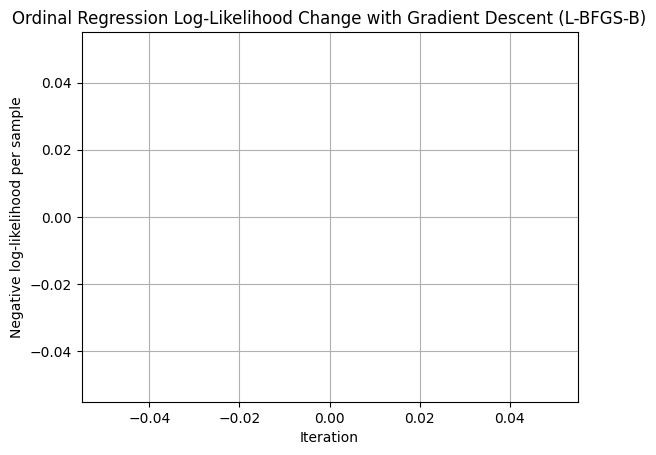

In [13]:
clf = OrdinalRegression(noise_variance = None, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)
VARIANCE:
1.0


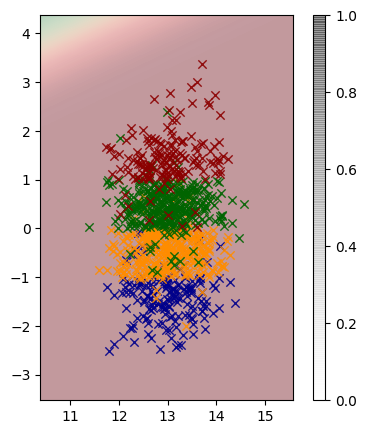

In [14]:
plot_model(clf)

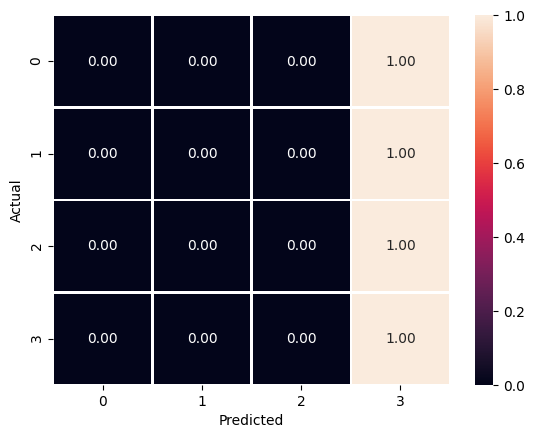

In [15]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Crescent Shapes

### Toy Data

In [16]:
cresent_df = pd.read_csv('../toydata/ordinal_data/crescent_shapes_4_labels.csv')
cresent_df

,x1,x2,label
0,0.941574,0.505779,0.0
1,-1.092763,-0.005928,0.0
2,0.439351,-0.509177,0.0
3,0.187745,0.076755,0.0
4,0.003034,-0.123461,0.0
...,...,...,...
2480,3.568087,0.585072,3.0
2481,6.732316,-0.126761,3.0
2482,6.684452,-0.217130,3.0
2483,6.921550,-1.518566,3.0


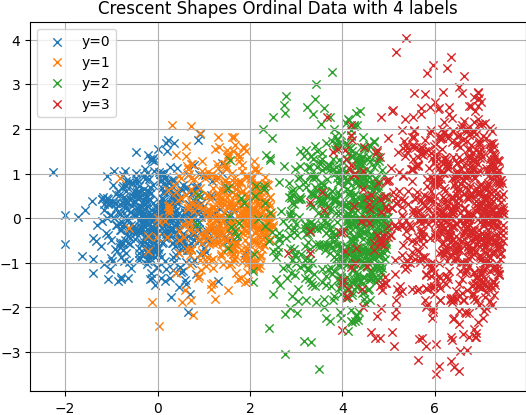

In [17]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/crescent_shapes_4_labels.png') 

In [18]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2485, 2)
[[ 9.41573847e-01  5.05778613e-01]
 [-1.09276303e+00 -5.92827714e-03]
 [ 4.39350881e-01 -5.09177383e-01]
 ...
 [ 6.68445210e+00 -2.17130055e-01]
 [ 6.92155034e+00 -1.51856577e+00]
 [ 6.84851267e+00  9.15530483e-01]]
y: (2485,)
[0 0 0 ... 3 3 3]


### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.54700898  3.19905952  3.07289744  0.87859549  0.02045029
 -1.37546124]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.79602998  3.06155724  3.00474975  1.12761648  0.40241577
 -1.46888117]
VARIANCE:
1
[ 0.54132485 -2.79602998  3.06155724  3.00474975  1.12761648  0.40241577
 -1.46888117]
PARAMS:
[ 0.54132485 -2.79602998  3.06155724  3.00474975  1.12761648  0.40241577
 -1.46888117]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.64511638  3.10503578  3.00322709  0.97662045  0.43573304
 -1.35044249]
VARIANCE:
1
PARAMS:
Autograd Arr

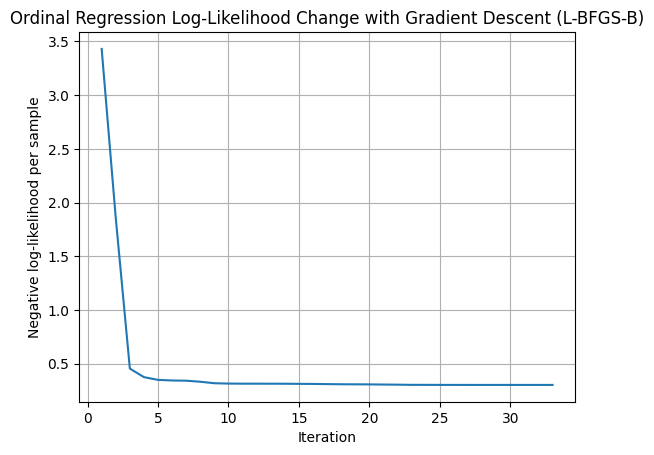

In [19]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)
VARIANCE:
1.0


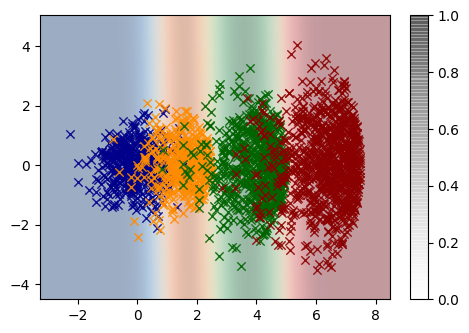

In [20]:
plot_model(clf)

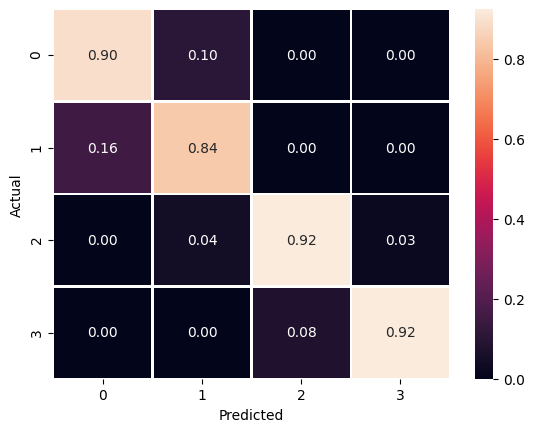

In [21]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Circles

### Toy Data, Point Density Factor = 1

In [22]:
circles_df = pd.read_csv('../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.csv')
circles_df

,x1,x2,ordinal_label
0,0.375490,0.153511,0
1,0.006069,-0.246922,0
2,0.323332,0.629520,0
3,-0.383603,0.867202,0
4,-0.378044,-0.776840,0
...,...,...,...
1781,0.126958,-4.188304,3
1782,3.573747,0.681222,3
1783,-3.751135,-0.253749,3
1784,-0.606367,2.853466,3


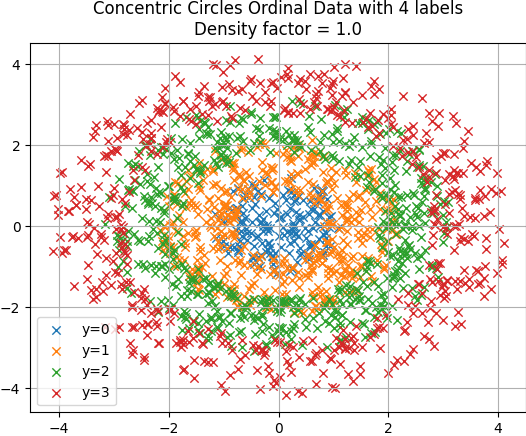

In [23]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.png') 

In [24]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = circles_df[['x1', 'x2']].values
y = circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1786, 2)
[[ 0.37549009  0.1535108 ]
 [ 0.006069   -0.24692199]
 [ 0.32333183  0.62951965]
 ...
 [-3.75113471 -0.25374931]
 [-0.60636748  2.85346599]
 [ 2.79673792  2.60042228]]
y: (1786,)
[0 0 0 ... 3 3 3]


### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.74547205  3.050018    2.94950777  1.07705856  0.3082141
 -0.71202745]
VARIANCE:
1
[ 0.54132485 -2.74547205  3.050018    2.94950777  1.07705856  0.3082141
 -0.71202745]
PARAMS:
[ 0.54132485 -2.74547205  3.050018    2.94950777  1.07705856  0.3082141
 -0.71202745]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -1.80832945  2.98901638  2.30923399  0.1389586  -2.13220442
  4.52722452]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.57837568  3.03914116  2.83534432  0.90979148 -0.12692255
  0.2221527 ]
VARIANCE:
1
[ 0.54132485 -2.5783756

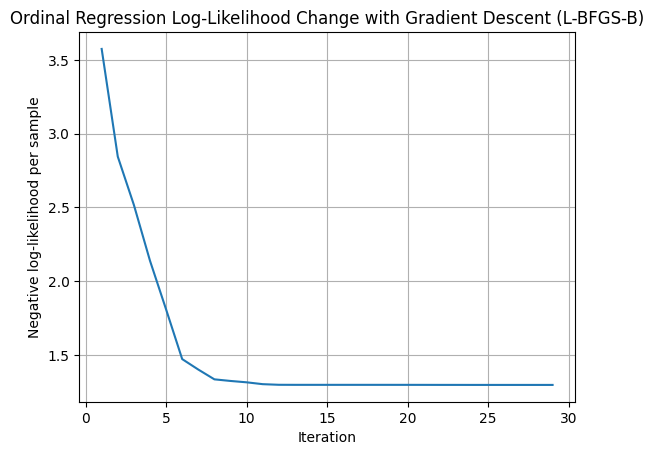

In [25]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)
VARIANCE:
1.0


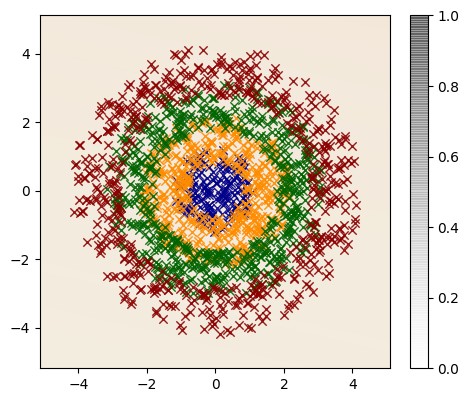

In [26]:
plot_model(clf)

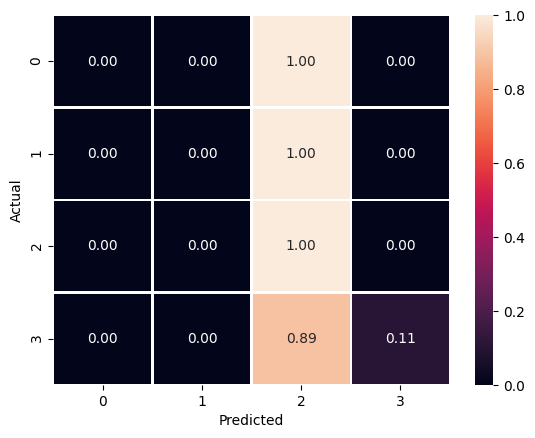

In [27]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [28]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

,x1,x2,ordinal_label
0,0.375490,0.153511,0
1,0.006069,-0.246922,0
2,0.323332,0.629520,0
3,0.187678,-0.673366,0
4,0.565982,-0.477484,0
...,...,...,...
901,1.991824,2.656294,3
902,0.417112,-4.132877,3
903,0.126958,-4.188304,3
904,3.573747,0.681222,3


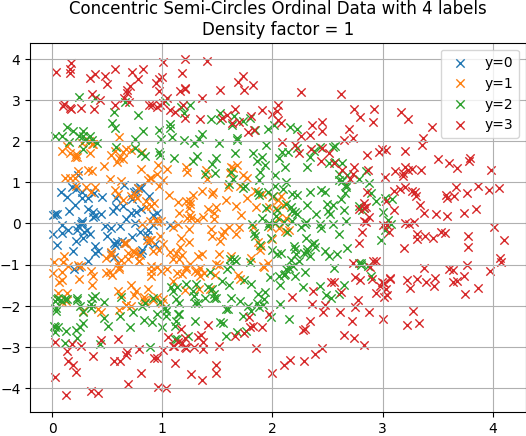

In [29]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [30]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (906, 2)
[[ 0.37549009  0.1535108 ]
 [ 0.006069   -0.24692199]
 [ 0.32333183  0.62951965]
 ...
 [ 0.12695832 -4.18830444]
 [ 3.5737472   0.68122152]
 [ 2.79673792  2.60042228]]
y: (906,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.63332919  3.19038449  2.9959715   0.9649157   0.48094371
 -0.76074793]
VARIANCE:
1
[ 0.54132485 -2.63332919  3.19038449  2.9959715   0.9649157   0.48094371
 -0.76074793]
PARAMS:
[ 0.54132485 -2.63332919  3.19038449  2.9959715   0.9649157   0.48094371
 -0.76074793]
VARIANCE:
1
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.23552035  3.27662836  2.76017856  0.5652819   0.63665452
  0.90372541]
VARIANCE:
1
[ 0.54132485 -2.23552035  3.27662836  2.76017856  0.5652819   0.63665452
  0.90372541]
PARAMS:
[ 0.54132485 -2.23552035  3.27662836  2.76017856  0.5652819  

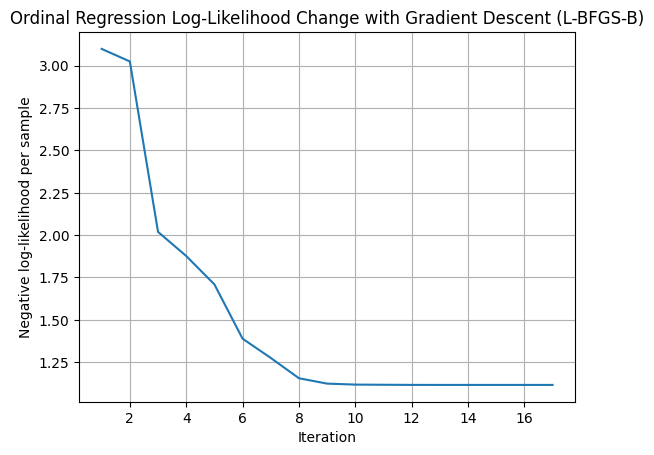

In [31]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)
VARIANCE:
1.0


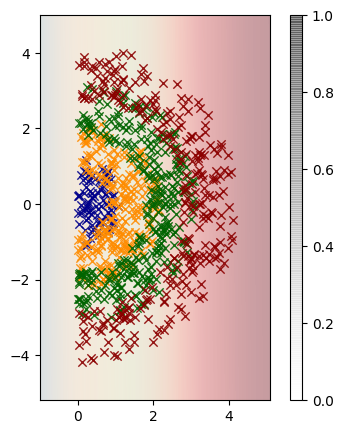

In [32]:
plot_model(clf)

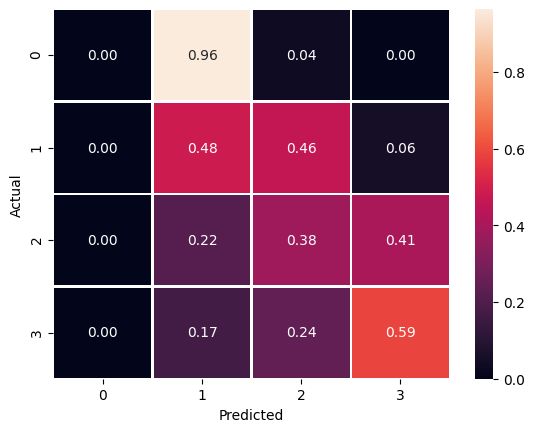

In [33]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Misc. Testing

In [34]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [36]:
clf = OrdinalRegression()
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [37]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [38]:
clf.fit(X, y)

INIT weights:
[-0.66927528 -0.90550912 -0.19910581  0.56901245]
INIT cutpoints:
[-3.  3.]
INIT deltas:
[6.]
INIT epsilons:
[5.99751817]
INIT PARAMS:
[ 0.54132485 -3.          5.99751817 -0.66927528 -0.90550912 -0.19910581
  0.56901245]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          5.99751817 -0.66927528 -0.90550912 -0.19910581
  0.56901245]
VARIANCE:
Autograd ArrayBox with value [1.]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value [nan nan nan nan nan nan nan]
VARIANCE:
Autograd ArrayBox with value [nan]
PARAMS:
Autograd ArrayBox with value

/Users/alexanderlobo/Code/pchmm-missing-data-limited-labels/venv/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


In [39]:
best_w = clf.w

In [40]:
clf.predict(X)

VARIANCE:
1.0


array([2, 1, 0, 2, 1, 0, 2, 1, 0])

## Softplus

In [46]:
test_arr = np.absolute(np.random.normal(size=3))
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

[1.28972831 0.54147194 0.3450314 ]
[ 0.96766791 -0.33054144 -0.88664877]
[1.28972831 0.54147194 0.3450314 ]


In [48]:
softplus_inv(0.5969)

-0.20275411295324475

In [49]:
softplus(np.array([1,2,3]))

array([1.31326169, 2.12692801, 3.04858735])

In [50]:
arr = np.array([1,2,10, 50])

In [51]:
arr.shape

(4,)

In [52]:
softplus(arr)

array([ 1.31326169,  2.12692801, 10.0000454 , 50.        ])

In [53]:
np.array(1)[np.newaxis].shape

(1,)